In [11]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

In [33]:
path = "/home/intern4/fm2026/fm_flow/code_it/logs"
run_idx = 0
run_ep = 4
log_root = Path(path) / f"{run_idx:05d}_train/test/ep_{run_ep}"
res_files = sorted(log_root.glob("*.mat"))
print(len(res_files))

128


In [34]:
idx = 0
# idx = 100

In [35]:
idx += 1
res_mat = loadmat(res_files[idx])
print(res_mat.keys())
print(res_mat['instruction_raw'])
# print(res_mat['instruction'])

dict_keys(['__header__', '__version__', '__globals__', 'input', 'out', 'label', 'text', 'instruction', 'instruction_raw'])
['Synthesize T2 contrast for this T1 MRI image.']


2
['Map this T1 brain MRI image to T2 contrast.']
PSNR: 23.4448
SSIM: 0.7576
(512, 512) (512, 512) (472, 472)


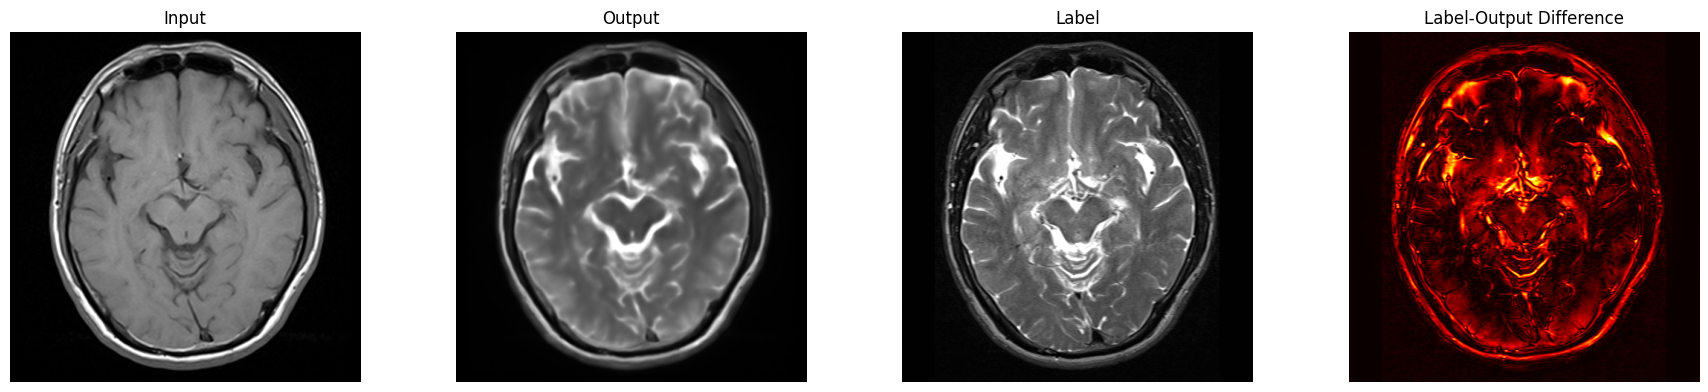

In [36]:
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim

idx += 1
print(idx)

res_mat = loadmat(res_files[idx])
input = res_mat["input"].squeeze()
out = res_mat["out"].squeeze()
label = res_mat["label"].squeeze()
print(res_mat['instruction_raw'])

x1, x2, y1, y2 = 20, -20, 20, -20
# print("instruction: ", res_mat["instruction"][0])

vmin_input = np.percentile(input, 0.5)
vmax_input = np.percentile(input, 99.5)
vmin_out = np.percentile(out, 0.5)
vmax_out = np.percentile(out, 99.5)

psnr_value = psnr(label, out, data_range=label.max() - label.min())
ssim_value = ssim(label, out, data_range=label.max() - label.min())
print(f"PSNR: {psnr_value:.4f}")
print(f"SSIM: {ssim_value:.4f}")
plt.figure(figsize=(18, 4))
plt.subplot(1, 4, 1)
plt.imshow(input[x1:x2, y1:y2], cmap="gray", vmin=vmin_input, vmax=vmax_input)
plt.title("Input")
plt.axis("off")
plt.subplot(1, 4, 2)
plt.imshow(out[x1:x2, y1:y2], cmap="gray", vmin=vmin_out, vmax=vmax_out)
plt.title("Output")
plt.axis("off")
plt.subplot(1, 4, 3)
plt.imshow(label[x1:x2, y1:y2], cmap="gray", vmin=vmin_out, vmax=vmax_out)
plt.title("Label")
plt.axis("off")
plt.subplot(1, 4, 4)
diff = np.abs(label[x1:x2, y1:y2] - out[x1:x2, y1:y2])
print(out.shape, label.shape, diff.shape)
plt.imshow(diff, cmap="hot")
# plt.colorbar()
plt.title("Label-Output Difference")
plt.axis("off")
# print(out.min(), out.max())
plt.tight_layout()
plt.show()

In [50]:
# metric calculation over the dataset
import re

run_idx = 1
run_ep = 0
log_root = Path(path) / f"{run_idx:05d}_train/test/ep_{run_ep}"
res_files = sorted(log_root.glob("*.mat"))

cnt = 0
psnr_tot = []
ssim_tot = []
            
for i in range(len(res_files)):
    res_mat = loadmat(res_files[i])
    input = res_mat["input"].squeeze()
    out = res_mat["out"].squeeze()
    label = res_mat["label"].squeeze()

    instruction_raw = res_mat.get("instruction_raw", [""])[0]
    instruction_raw = str(instruction_raw)
    if not re.search(
        r"(convert|translate|generate|synthesize|transform|map|render|turn).*(t1|t2|flair|t1ce)",
        instruction_raw,
        re.IGNORECASE,
    ):
        continue
    cnt = cnt + 1

    data_range = float(label.max() - label.min())
    psnr_value = psnr(label, out, data_range=data_range)
    ssim_value = ssim(label, out, data_range=data_range)
    psnr_tot.append(psnr_value)
    ssim_tot.append(ssim_value)

print(f"PSNR: {np.mean(psnr_tot):.2f} ± {np.std(psnr_tot):.2f}")
print(f"SSIM: {np.mean(ssim_tot):.4f} ± {np.std(ssim_tot):.4f}")
print("count:", cnt)

PSNR: 22.37 ± 2.48
SSIM: 0.7650 ± 0.0714
count: 45


In [51]:
print(input.shape)
print(input.min(), input.max())
print(input.mean(), input.std())
print(input)

(512, 512)
-0.8030505 5.236048
-8.568168e-08 1.0
[[-0.8030505 -0.8030505 -0.8030505 ... -0.8030505 -0.8030505 -0.8030505]
 [-0.8030505 -0.8030505 -0.8030505 ... -0.8030505 -0.8030505 -0.8030505]
 [-0.8030505 -0.8030505 -0.8030505 ... -0.8030505 -0.8030505 -0.8030505]
 ...
 [-0.8030505 -0.8030505 -0.8030505 ... -0.8030505 -0.8030505 -0.8030505]
 [-0.8030505 -0.8030505 -0.8030505 ... -0.8030505 -0.8030505 -0.8030505]
 [-0.8030505 -0.8030505 -0.8030505 ... -0.8030505 -0.8030505 -0.8030505]]
